### Hybrid Recommendation System with Combine Switching and Weighted for Tourism Destination in Bali

### Hybrid Recommender System using Singular Value Decomposition and Support Vector Machine in Bali Tourism

### Main Problem
- Bagaimana membangun sebuah model recommender system untuk menyelesaikan masalah cold start problem ?
- Bagaiamana hasil akurasi dengan pengujian MAE dan RMSE ?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import GridSearchCV
import nltk
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
dt_destination = pd.read_csv('dataset_destination.csv')
dt_rating = pd.read_csv('dt_rating.csv')
dt_user = pd.read_csv('dt_user.csv')

In [3]:
dt_rating

,Rating,Review,destination_id,user_id
0,5,Sangat menikmati melihat monyet-monyet di ling...,1,445
1,4,Mandala Wisata Wenara Wana atau disebut juga H...,1,1020
2,5,Meski sudah berkali-kali ke Bali dan sering me...,1,2970
3,5,"Saya sangat sering datang kesini,Tempat ini sa...",1,750
4,3,tiket masuk dewasa : 50.000 dan anak anak 40.0...,1,1841
...,...,...,...,...
16946,5,Untuk menemukan pantai ini sedikit agak sukut ...,120,1046
16947,5,Pantai yg bagus dan barsih. Tidak ramai pengun...,120,3475
16948,5,Gak banyak warga lokal pergi kesini dan kebany...,120,875
16949,5,"seru banget pengalaman kesini, akses jalannya ...",120,2794


<AxesSubplot:xlabel='Rating', ylabel='count'>

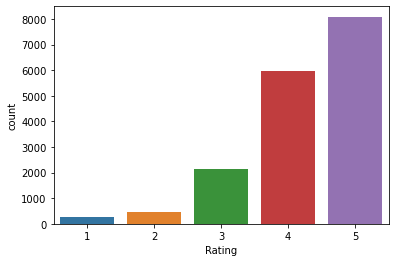

In [4]:
sns.countplot(x='Rating',data=dt_rating)

## Collaborative Filtering using SVD

#### Find Hyperparameter in SVD 

In [5]:
# algo = SVD()

In [6]:
# algo.predict(uid=15, iid=12)

In [7]:
# prediction = algo.predict(1,7)
# prediction.est

In [8]:
reader = Reader()
data = Dataset.load_from_df(dt_rating[['user_id', 'destination_id', 'Rating']], reader)

In [9]:
param_grid = {'n_factors':[50,100,150],'n_epochs':[20,30],  'lr_all':[0.005,0.01],'reg_all':[0.02,0.1]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.8472632390161148
{'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}


In [10]:
algo = SVD(n_factors=50, n_epochs=20,lr_all=0.005,reg_all=0.1)

In [11]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8316  0.8689  0.8289  0.8281  0.8574  0.8590  0.8472  0.8592  0.8405  0.8462  0.8467  0.0136  
MAE (testset)     0.6576  0.6795  0.6436  0.6562  0.6751  0.6854  0.6657  0.6734  0.6703  0.6727  0.6679  0.0118  
Fit time          0.52    0.52    0.52    0.52    0.53    0.56    0.57    0.57    0.58    0.57    0.55    0.02    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([0.83163679, 0.86886802, 0.82889884, 0.82807456, 0.85738053,
        0.8590465 , 0.84718905, 0.8592378 , 0.84050192, 0.84615147]),
 'test_mae': array([0.65764833, 0.6794841 , 0.64363421, 0.65619831, 0.67505379,
        0.6853793 , 0.66569277, 0.67339302, 0.6702679 , 0.67269434]),
 'fit_time': (0.5224909782409668,
  0.5171689987182617,
  0.5232269763946533,
  0.5218870639801025,
  0.528193473815918,
  0.5586142539978027,
  0.5710997581481934,
  0.5723493099212646,
  0.5769820213317871,
  0.5710129737854004),
 'test_time': (0.008943796157836914,
  0.008974075317382812,
  0.008974552154541016,
  0.00901174545288086,
  0.009960412979125977,
  0.009942054748535156,
  0.009977340698242188,
  0.00997781753540039,
  0.009973287582397461,
  0.008976459503173828)}

#### Code for Collaborative Filtering Using SVD

In [12]:
reader = Reader(rating_scale=(1, 5))

In [13]:
dt_destination.head()

,destination_id,Destination Name,Rating,Total Review,Category,Location,Duration,Latitude,Longitude,Regency,Description
0,1,Mandala Suci Wenara Wana,4,34.872,Area Wisata Alam& Taman Margasatwa,"Jl. Monkey Forest, Ubud 80571 Indonesia",1-2 jam,-8.512077,115.261053,Gianyar,Mandala Suci Wenara Wana atau disebut juga Mon...
1,2,Gunung Agung,4,455.000,Pegunungan,"Besakih, Kecamatan Karangasem, Kabupaten Karan...",Lebih dari 3 jam,-8.338936,115.508228,Karangasem,Gunung Agung adalah gunung tertinggi di pulau ...
2,3,Waterbom Bali,4,15.502,Taman Air,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Lebih dari 3 jam,-8.730345,115.167818,Badung,Taman bermain air yang dilengkapi dengan wahan...
3,4,Pantai Double Six,4,2.031,Pantai,"Legian, Jl. Double Six, Seminyak, Kuta, Kabupa...",2-3 jam,-8.696862,115.161924,Badung,Pantai di Seminyak ini punya banyak daya pikat...
4,5,Pantai Seminyak,4,5.637,Pantai,"Desa Seminyak, Kecamatan Kuta, Kabupaten Badung",2-3 jam,-8.691655,115.157316,Badung,Pantai seminyak (beberapa orang menyebutnya Pa...


In [14]:
total_destination = 120
all_destination = dt_rating.destination_id.unique()
data_cf = Dataset.load_from_df(dt_rating[['user_id', 'destination_id', 'Rating']], reader)
trainset = data_cf.build_full_trainset()
model = SVD(n_factors=100, n_epochs=20,lr_all=0.005,reg_all=0.1)
model.fit(trainset)

In [15]:
def recommend_collaborative_svd(user_id):
    already_rated_dest = dt_rating[dt_rating.user_id == user_id].destination_id
    not_rated_dest = [destination_id for destination_id in all_destination if destination_id not in already_rated_dest]
    predict_rtscore = [model.predict(user_id, destination_id).est for destination_id in not_rated_dest]
    predict_result = pd.DataFrame({'destination_id': not_rated_dest, 'predict_cf_rate' : predict_rtscore})
    print('Rating Prediction for User :',user_id)
    predict_result_cb = pd.merge(predict_result, dt_destination, on='destination_id')
    predict_result_cb = predict_result_cb[['Destination Name','destination_id','predict_cf_rate']]
    return predict_result_cb

def collaborative_filtering(user_id,destination_id):
    algo = SVD(n_factors=50, n_epochs=20,lr_all=0.005,reg_all=0.1)
    reader = Reader(rating_scale=(1, 5))
    data_new = Dataset.load_from_df(dt_rating[['user_id', 'destination_id', 'Rating']], reader)
    train_set = data_new.build_full_trainset()
    model = SVD(n_factors=100, n_epochs=20,lr_all=0.005,reg_all=0.1)
    model.fit(trainset)
    rat_predict_cf = model.predict(user_id, destination_id).est
    return rat_predict_cf

In [16]:
recommend_collaborative_svd(1)

Rating Prediction for User : 1


,Destination Name,destination_id,predict_cf_rate
0,Mandala Suci Wenara Wana,1,4.279567
1,Gunung Agung,2,4.590262
2,Waterbom Bali,3,4.553885
3,Pantai Double Six,4,3.977650
4,Pantai Seminyak,5,4.202832
...,...,...,...
112,Oasis Yoga Studio,116,3.263516
113,Peek A Boo,117,3.749052
114,Goa Gajah,118,3.755923
115,Pantai Prancak,119,4.246668


In [17]:
collaborative_filtering(1,2)

4.668785786176335

### RMSE and MAE Test

In [18]:
cross_validate(model, data_cf, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8450  0.8669  0.8184  0.8537  0.8450  0.8561  0.8345  0.8241  0.8676  0.8627  0.8474  0.0164  
MAE (testset)     0.6597  0.6779  0.6507  0.6752  0.6745  0.6746  0.6569  0.6636  0.6777  0.6764  0.6687  0.0095  
Fit time          0.87    0.94    0.93    0.92    1.01    0.83    0.85    0.88    0.88    0.90    0.90    0.05    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([0.84502831, 0.86688057, 0.81837505, 0.85373384, 0.8450263 ,
        0.85612703, 0.83454111, 0.82412213, 0.86759806, 0.86267865]),
 'test_mae': array([0.65968237, 0.67792963, 0.65069696, 0.67516113, 0.67451603,
        0.67461579, 0.65694608, 0.66357041, 0.67773227, 0.67636822]),
 'fit_time': (0.8691916465759277,
  0.9399704933166504,
  0.9346590042114258,
  0.915729284286499,
  1.0053822994232178,
  0.825411319732666,
  0.8476712703704834,
  0.8837578296661377,
  0.8832852840423584,
  0.8965437412261963),
 'test_time': (0.009964466094970703,
  0.012033700942993164,
  0.010006427764892578,
  0.012973785400390625,
  0.008932828903198242,
  0.008971214294433594,
  0.009971380233764648,
  0.010939359664916992,
  0.009973764419555664,
  0.00897073745727539)}

## Content Based Filtering

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

### Build Item Profiles

In [20]:
dt_destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   destination_id    120 non-null    int64  
 1   Destination Name  120 non-null    object 
 2   Rating            120 non-null    int64  
 3   Total Review      120 non-null    float64
 4   Category          120 non-null    object 
 5   Location          120 non-null    object 
 6   Duration          120 non-null    object 
 7   Latitude          120 non-null    float64
 8   Longitude         120 non-null    float64
 9   Regency           120 non-null    object 
 10  Description       120 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 10.4+ KB


In [21]:
dt_destination.head()

,destination_id,Destination Name,Rating,Total Review,Category,Location,Duration,Latitude,Longitude,Regency,Description
0,1,Mandala Suci Wenara Wana,4,34.872,Area Wisata Alam& Taman Margasatwa,"Jl. Monkey Forest, Ubud 80571 Indonesia",1-2 jam,-8.512077,115.261053,Gianyar,Mandala Suci Wenara Wana atau disebut juga Mon...
1,2,Gunung Agung,4,455.000,Pegunungan,"Besakih, Kecamatan Karangasem, Kabupaten Karan...",Lebih dari 3 jam,-8.338936,115.508228,Karangasem,Gunung Agung adalah gunung tertinggi di pulau ...
2,3,Waterbom Bali,4,15.502,Taman Air,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Lebih dari 3 jam,-8.730345,115.167818,Badung,Taman bermain air yang dilengkapi dengan wahan...
3,4,Pantai Double Six,4,2.031,Pantai,"Legian, Jl. Double Six, Seminyak, Kuta, Kabupa...",2-3 jam,-8.696862,115.161924,Badung,Pantai di Seminyak ini punya banyak daya pikat...
4,5,Pantai Seminyak,4,5.637,Pantai,"Desa Seminyak, Kecamatan Kuta, Kabupaten Badung",2-3 jam,-8.691655,115.157316,Badung,Pantai seminyak (beberapa orang menyebutnya Pa...


In [22]:
dt_item_prof = dt_destination.copy()

In [23]:
features_extract = ['Duration ','Description','Regency']
for column in features_extract:
    dt_item_prof[column] = dt_item_prof[column].apply(lambda x: x.lower())
    dt_item_prof[column] = dt_item_prof[column].apply(lambda x: re.sub('[^a-zA-Z 0-9]', ' ',x))

In [24]:
dt_item_prof = dt_item_prof[['destination_id','Destination Name','Duration ','Regency','Description']]

In [25]:
dt_item_prof

,destination_id,Destination Name,Duration,Regency,Description
0,1,Mandala Suci Wenara Wana,1 2 jam,gianyar,mandala suci wenara wana atau disebut juga mon...
1,2,Gunung Agung,lebih dari 3 jam,karangasem,gunung agung adalah gunung tertinggi di pulau ...
2,3,Waterbom Bali,lebih dari 3 jam,badung,taman bermain air yang dilengkapi dengan wahan...
3,4,Pantai Double Six,2 3 jam,badung,pantai di seminyak ini punya banyak daya pikat...
4,5,Pantai Seminyak,2 3 jam,badung,pantai seminyak beberapa orang menyebutnya pa...
...,...,...,...,...,...
115,116,Oasis Yoga Studio,2 3 jam,seminyak,kami memiliki lebih dari beberapa program di l...
116,117,Peek A Boo,1 2 jam,denpasar,tempat yang sangat cocok untuk membawa anak be...
117,118,Goa Gajah,1 2 jam,gianyar,gua gajah adalah gua buatan dari masa purbakal...
118,119,Pantai Prancak,2 3 jam,badung,pantai perancak di desa tibubeneng canggu ber...


In [26]:
dt_item_prof['metadata_soup'] = dt_item_prof['Regency'] + ' ' + dt_item_prof['Description'] + ' ' + dt_item_prof['Duration ']

In [27]:
dt_item_prof

,destination_id,Destination Name,Duration,Regency,Description,metadata_soup
0,1,Mandala Suci Wenara Wana,1 2 jam,gianyar,mandala suci wenara wana atau disebut juga mon...,gianyar mandala suci wenara wana atau disebut ...
1,2,Gunung Agung,lebih dari 3 jam,karangasem,gunung agung adalah gunung tertinggi di pulau ...,karangasem gunung agung adalah gunung tertingg...
2,3,Waterbom Bali,lebih dari 3 jam,badung,taman bermain air yang dilengkapi dengan wahan...,badung taman bermain air yang dilengkapi denga...
3,4,Pantai Double Six,2 3 jam,badung,pantai di seminyak ini punya banyak daya pikat...,badung pantai di seminyak ini punya banyak day...
4,5,Pantai Seminyak,2 3 jam,badung,pantai seminyak beberapa orang menyebutnya pa...,badung pantai seminyak beberapa orang menyebu...
...,...,...,...,...,...,...
115,116,Oasis Yoga Studio,2 3 jam,seminyak,kami memiliki lebih dari beberapa program di l...,seminyak kami memiliki lebih dari beberapa pro...
116,117,Peek A Boo,1 2 jam,denpasar,tempat yang sangat cocok untuk membawa anak be...,denpasar tempat yang sangat cocok untuk membaw...
117,118,Goa Gajah,1 2 jam,gianyar,gua gajah adalah gua buatan dari masa purbakal...,gianyar gua gajah adalah gua buatan dari masa ...
118,119,Pantai Prancak,2 3 jam,badung,pantai perancak di desa tibubeneng canggu ber...,badung pantai perancak di desa tibubeneng cang...


In [28]:
#Tokenizing
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def cleaning_text(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    #remove number
    text = re.sub(r"\d+", "", text)
    return text

#melakukan remove terhadap tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

#melakukan remove whitespace
def remove_whitespace_leadtrail(text):
    return text.strip()

#melakukan remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

#nltk word tokenize
def word_tokenize_wrapper(text):
    return nltk.tokenize.word_tokenize(text)

In [29]:
dt_item_prof['metadata_soup'] = dt_item_prof['metadata_soup'].apply(cleaning_text)
dt_item_prof['metadata_soup'] = dt_item_prof['metadata_soup'].apply(remove_punctuation)
dt_item_prof['metadata_soup'] = dt_item_prof['metadata_soup'].apply(remove_whitespace_leadtrail)
dt_item_prof['metadata_soup'] = dt_item_prof['metadata_soup'].apply(remove_single_char)

In [30]:
dt_item_prof.head()

,destination_id,Destination Name,Duration,Regency,Description,metadata_soup
0,1,Mandala Suci Wenara Wana,1 2 jam,gianyar,mandala suci wenara wana atau disebut juga mon...,gianyar mandala suci wenara wana atau disebut ...
1,2,Gunung Agung,lebih dari 3 jam,karangasem,gunung agung adalah gunung tertinggi di pulau ...,karangasem gunung agung adalah gunung tertingg...
2,3,Waterbom Bali,lebih dari 3 jam,badung,taman bermain air yang dilengkapi dengan wahan...,badung taman bermain air yang dilengkapi denga...
3,4,Pantai Double Six,2 3 jam,badung,pantai di seminyak ini punya banyak daya pikat...,badung pantai di seminyak ini punya banyak day...
4,5,Pantai Seminyak,2 3 jam,badung,pantai seminyak beberapa orang menyebutnya pa...,badung pantai seminyak beberapa orang menyebut...


### TF-IDF Vectors

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
tf_idf = TfidfVectorizer()
dt_destination_tf_idf_described = tf_idf.fit_transform(dt_item_prof.metadata_soup)

In [32]:
dt_destination_tf_idf_described

<120x1378 sparse matrix of type '<class 'numpy.float64'>'
	with 4112 stored elements in Compressed Sparse Row format>

In [33]:
df_tfidf_d2d = pd.DataFrame(cosine_similarity(dt_destination_tf_idf_described))
index_to_destination_id = dt_item_prof['destination_id']
df_tfidf_d2d.columns = [str(index_to_destination_id[int(col)]) for col in df_tfidf_d2d.columns]
df_tfidf_d2d.index = [index_to_destination_id[idx] for idx in df_tfidf_d2d.index]

In [34]:
#matrix cosine similarity antara destination
df_tfidf_d2d

,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
1,1.000000,0.074162,0.039477,0.051945,0.049626,0.054724,0.036297,0.042448,0.053926,0.047489,...,0.094836,0.087987,0.015805,0.019934,0.002706,0.027368,0.031816,0.125903,0.058981,0.026971
2,0.074162,1.000000,0.031746,0.050546,0.076106,0.044223,0.068176,0.034383,0.075542,0.058429,...,0.125899,0.021705,0.030903,0.066544,0.011007,0.037122,0.014165,0.105756,0.027579,0.042192
3,0.039477,0.031746,1.000000,0.052706,0.023806,0.129629,0.009956,0.013487,0.028996,0.031935,...,0.136784,0.127633,0.013789,0.018453,0.033077,0.041862,0.112876,0.046490,0.031619,0.055761
4,0.051945,0.050546,0.052706,1.000000,0.244807,0.060367,0.143994,0.024818,0.159935,0.129496,...,0.078473,0.071312,0.032252,0.102749,0.103993,0.057042,0.079039,0.036795,0.095446,0.107133
5,0.049626,0.076106,0.023806,0.244807,1.000000,0.042915,0.066600,0.061341,0.191306,0.178579,...,0.060278,0.027980,0.072757,0.127089,0.057381,0.117375,0.054378,0.071159,0.144395,0.216003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.027368,0.037122,0.041862,0.057042,0.117375,0.188749,0.037107,0.010181,0.035921,0.032930,...,0.036910,0.092271,0.020683,0.023972,0.020000,1.000000,0.165319,0.028784,0.019975,0.044440
117,0.031816,0.014165,0.112876,0.079039,0.054378,0.093723,0.002163,0.015071,0.034192,0.028138,...,0.051360,0.362119,0.090863,0.015176,0.061745,0.165319,1.000000,0.032638,0.021654,0.013999
118,0.125903,0.105756,0.046490,0.036795,0.071159,0.036227,0.027719,0.077629,0.062473,0.032447,...,0.072177,0.054399,0.038544,0.012354,0.021265,0.028784,0.032638,1.000000,0.031001,0.047317
119,0.058981,0.027579,0.031619,0.095446,0.144395,0.021041,0.017168,0.044301,0.187556,0.129841,...,0.158404,0.015423,0.018534,0.117060,0.057683,0.019975,0.021654,0.031001,1.000000,0.109460


### Build User Profile

In [35]:
#example using user_id 1
dt_rating_user = dt_rating[dt_rating.user_id == 2]

In [36]:
dt_rating_user

,Rating,Review,destination_id,user_id
15434,5,Yang terbaik adalah untuk menyewa sepeda motor...,94,2


In [37]:
dt_user_data = dt_item_prof.reset_index().merge(dt_rating_user, on='destination_id')

In [38]:
dt_user_data

,index,destination_id,Destination Name,Duration,Regency,Description,metadata_soup,Rating,Review,user_id
0,93,94,Danau Batur,lebih dari 3 jam,bangli,danau batur adalah danau kawah di kintamani k...,bangli danau batur adalah danau kawah di kinta...,5,Yang terbaik adalah untuk menyewa sepeda motor...,2


In [39]:
#perhitungan pembobotan rating dengan melakukan pembagian dengan rating tertinggi yang ada pada dataset
dt_user_data['weight'] = dt_user_data['Rating']/5.

In [40]:
#hitung user profile 
user_profile = np.dot(dt_destination_tf_idf_described[dt_user_data['index'].values].toarray().T, dt_user_data['weight'].values)

In [41]:
print(user_profile)

[0. 0. 0. ... 0. 0. 0.]


In [42]:
C = cosine_similarity(np.atleast_2d(user_profile), dt_destination_tf_idf_described)

In [43]:
C[0][0]

0.09583553643663893

In [44]:
sim_data = []
for i in range(120):
    sim_data.append(C[0][i])
len(sim_data)
df = pd.DataFrame(columns=['destination_id','cosine_similarity'])
df['destination_id'] = pd.Series(range(1,121))
df['cosine_similarity'] = sim_data
df

,destination_id,cosine_similarity
0,1,0.095836
1,2,0.279301
2,3,0.018136
3,4,0.032691
4,5,0.041169
...,...,...
115,116,0.034350
116,117,0.001812
117,118,0.092070
118,119,0.040561


In [45]:
def rating_prediction_cb(df,destination_id,threshold,x):
    cosine_sim = df[df.destination_id == destination_id]
    rating = (x-threshold) * cosine_sim.iloc[0]['cosine_similarity'] + threshold
    return rating

In [46]:
def content_based_recommender(userid,destination_id):
    x = 5
    threshold = 3.5
    destination = []
    dt_rating_user = dt_rating[dt_rating.user_id == userid]
    dt_user_data = dt_item_prof.reset_index().merge(dt_rating_user, on='destination_id')
    dt_user_data['weight'] = dt_user_data['Rating']/5.
    user_profile = np.dot(dt_destination_tf_idf_described[dt_user_data['index'].values].toarray().T, dt_user_data['weight'].values)
    C = cosine_similarity(np.atleast_2d(user_profile), dt_destination_tf_idf_described)
    sim_data = []
    for i in range(120):
        sim_data.append(C[0][i])
    df = pd.DataFrame(columns=['destination_id','cosine_similarity'])
    df['destination_id'] = pd.Series(range(1,121))
    df['cosine_similarity'] = sim_data
    return rating_prediction_cb(df,destination_id,threshold,x)

In [47]:
#testing content_based for user 1 and destination 2
content_based_recommender(4,1)

4.068295877103131

In [48]:
#predict all rating not rated from user id 4
#98 dan 100
pred_rating = []
already_rated_dest = dt_rating[dt_rating.user_id == 1].destination_id.to_list()
print(already_rated_dest)
not_rated_dest = [destination_id for destination_id in all_destination if destination_id not in already_rated_dest]
for i in not_rated_dest:
    pred_rating.append(content_based_recommender(4,i))
pred_rating

[21, 24, 104]


[4.068295877103131,
 3.810822019922466,
 3.64564772224131,
 3.9334895263958622,
 4.3320615868565095,
 3.679158678173462,
 3.6276375334795348,
 3.7289263787922917,
 3.9773321477043417,
 3.941426309579463,
 3.799820128620193,
 3.6443671410298886,
 4.217705911020651,
 4.017552107811191,
 3.6180796230867256,
 3.794991460107712,
 3.6481214038500744,
 4.0344907662412375,
 3.758996026502273,
 3.683696050313589,
 3.8223967405578088,
 3.7771225261095682,
 3.7507836901899063,
 3.9143735983638916,
 3.701194207834227,
 3.9628924255896294,
 3.8015625253004632,
 3.8995474236138072,
 3.62698454655073,
 3.812140228713961,
 3.8959622137335046,
 3.658184599816811,
 3.714829379130176,
 3.686619495027913,
 3.6917573570800384,
 3.9041576768194006,
 3.7352620669989913,
 3.697600151509683,
 3.790059429014246,
 4.131556737150165,
 3.6601400249005875,
 4.315408062858833,
 3.7023900279640722,
 3.9358203127858733,
 4.006443432103185,
 4.07820082488889,
 3.83717964092589,
 3.8291822830784987,
 3.6084773461242037,

In [49]:
# predict all rating from user 4
pred_rating_cb = []
for i in range(1,121):
    pred_rating_cb.append(content_based_recommender(4,i))
pred_rating_cb

[4.068295877103131,
 3.810822019922466,
 3.64564772224131,
 3.9334895263958622,
 4.3320615868565095,
 3.679158678173462,
 3.6276375334795348,
 3.7289263787922917,
 3.9773321477043417,
 3.941426309579463,
 3.799820128620193,
 3.6443671410298886,
 4.217705911020651,
 4.017552107811191,
 3.6180796230867256,
 3.794991460107712,
 3.6481214038500744,
 4.0344907662412375,
 3.758996026502273,
 3.683696050313589,
 3.861985560094225,
 3.8223967405578088,
 3.7771225261095682,
 3.7433685823262963,
 3.7507836901899063,
 3.9143735983638916,
 3.701194207834227,
 3.9628924255896294,
 3.8015625253004632,
 3.6761628957696857,
 3.8995474236138072,
 3.62698454655073,
 3.812140228713961,
 3.8959622137335046,
 3.658184599816811,
 3.714829379130176,
 3.686619495027913,
 3.6917573570800384,
 3.9041576768194006,
 3.7352620669989913,
 3.697600151509683,
 3.790059429014246,
 4.131556737150165,
 3.6601400249005875,
 4.315408062858833,
 3.7023900279640722,
 3.9358203127858733,
 4.006443432103185,
 4.07820082488889

## Demographic Filtering using SVM

In [50]:
dt_rating

,Rating,Review,destination_id,user_id
0,5,Sangat menikmati melihat monyet-monyet di ling...,1,445
1,4,Mandala Wisata Wenara Wana atau disebut juga H...,1,1020
2,5,Meski sudah berkali-kali ke Bali dan sering me...,1,2970
3,5,"Saya sangat sering datang kesini,Tempat ini sa...",1,750
4,3,tiket masuk dewasa : 50.000 dan anak anak 40.0...,1,1841
...,...,...,...,...
16946,5,Untuk menemukan pantai ini sedikit agak sukut ...,120,1046
16947,5,Pantai yg bagus dan barsih. Tidak ramai pengun...,120,3475
16948,5,Gak banyak warga lokal pergi kesini dan kebany...,120,875
16949,5,"seru banget pengalaman kesini, akses jalannya ...",120,2794


In [51]:
dt_user

,user_id,Travel_Style,Region,Country,Member_Since
0,1,Keluarga,Jakarta,Indonesia,Apr 2021
1,2,Bisnis,Denpasar,Indonesia,Jan 2021
2,3,Bisnis,Ubud,Indonesia,Nov 2020
3,4,Keluarga,Jakarta,Indonesia,Mei 2016
4,5,Keluarga,Cikarang,Indonesia,Okt 2015
...,...,...,...,...,...
3495,3496,Teman,Bintulu,Malaysia,Jan 2014
3496,3497,Teman,Bandung,Indonesia,Nov 2015
3497,3498,Teman,Jakarta,Indonesia,Nov 2015
3498,3499,Pasangan,Jakarta,Indonesia,Sep 2015


In [52]:
dt_user.Country.nunique()

194

In [53]:
dt_user.Region.nunique()

1065

In [54]:
dt_user.Travel_Style.nunique()

5

In [55]:
dt_combine = pd.merge(dt_rating, dt_user, on='user_id')

In [56]:
dt_combine = dt_combine.sort_values(by='destination_id')
dt_combine = dt_combine.reset_index(drop=True)

In [57]:
dt_combine

,Rating,Review,destination_id,user_id,Travel_Style,Region,Country,Member_Since
0,5,Sangat menikmati melihat monyet-monyet di ling...,1,445,Keluarga,Mandurah,Australia,Feb 2017
1,5,"Tidak jauh dari jalan utama Ubud yang sibuk, h...",1,1030,Pasangan,London,Inggris Raya,Mei 2013
2,5,Tempat yang keren. Bahkan ketika ramai Anda ak...,1,2055,Pasangan,Sydney,Australia,Sep 2009
3,4,Cukup mahal untuk apa itu sekitar $ 6 per oran...,1,3197,Teman,Makassar,Indonesia,Mar 2014
4,5,Menyenangkan! Sangat nyaman untuk berjalan di ...,1,382,Teman,New Delhi,India,Mei 2017
...,...,...,...,...,...,...,...,...
16946,3,"Perjalanan kesini sungguh melelahkan, harus me...",120,929,Keluarga,Sydney,Australia,Jul 2015
16947,4,Pertama cuma iseng cari pantai yang free tapi ...,120,2819,Pasangan,Bangkok,Thailand,Mar 2014
16948,5,Pantai Nyang-Nyang merupakan pantai yang indah...,120,2891,Pasangan,Singapur,Singapur,Jan 2010
16949,4,tempat ini memang belum banyak wisatawan yang ...,120,2194,Pasangan,Sydney,Australia,Apr 2015


In [58]:
dt_combine = dt_combine[['destination_id','user_id','Travel_Style','Region','Country','Rating']]

In [59]:
dt_combine

,destination_id,user_id,Travel_Style,Region,Country,Rating
0,1,445,Keluarga,Mandurah,Australia,5
1,1,1030,Pasangan,London,Inggris Raya,5
2,1,2055,Pasangan,Sydney,Australia,5
3,1,3197,Teman,Makassar,Indonesia,4
4,1,382,Teman,New Delhi,India,5
...,...,...,...,...,...,...
16946,120,929,Keluarga,Sydney,Australia,3
16947,120,2819,Pasangan,Bangkok,Thailand,4
16948,120,2891,Pasangan,Singapur,Singapur,5
16949,120,2194,Pasangan,Sydney,Australia,4


In [60]:
list_destination_id = dt_combine.destination_id.unique()

In [61]:
def split_by_destination_id(destination_id):
    df = dt_combine[dt_combine.destination_id == destination_id]
    return df

In [62]:
dataframe = split_by_destination_id(7)

In [63]:
dataframe.head()

,destination_id,user_id,Travel_Style,Region,Country,Rating
1439,7,2777,Pasangan,Australia Barat,Australia,4
1440,7,1568,Pasangan,Christchurch,Selandia Baru,4
1441,7,2507,Pasangan,Melbourne,Australia,3
1442,7,159,Keluarga,Leland,North Carolina,3
1443,7,903,Teman,Canning Vale,Australia,4


In [64]:
dataframe['Region'] = dataframe['Region'].apply(lambda x: x.lower())
dataframe['Country'] = dataframe['Country'].apply(lambda x: x.lower())

In [65]:
dt_user_testing = dt_user[dt_user.user_id == 1]
dt_user_testing

,user_id,Travel_Style,Region,Country,Member_Since
0,1,Keluarga,Jakarta,Indonesia,Apr 2021


In [66]:
data_combine_df = dataframe.append(dt_user_testing)
data_combine_df.head()

,destination_id,user_id,Travel_Style,Region,Country,Rating,Member_Since
1439,7.0,2777,Pasangan,australia barat,australia,4.0,NaN
1440,7.0,1568,Pasangan,christchurch,selandia baru,4.0,NaN
1441,7.0,2507,Pasangan,melbourne,australia,3.0,NaN
1442,7.0,159,Keluarga,leland,north carolina,3.0,NaN
1443,7.0,903,Teman,canning vale,australia,4.0,NaN


In [67]:
import category_encoders as ce
one_hot_encoding =ce.OneHotEncoder(cols=['Travel_Style','Region','Country'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [68]:
data_encoded = one_hot_encoding.fit_transform(data_combine_df)
data_encoded.head()

,destination_id,user_id,Travel_Style_ Pasangan,Travel_Style_ Keluarga,Travel_Style_ Teman,Travel_Style_ Sendiri,Region_australia barat,Region_christchurch,Region_melbourne,Region_leland,...,Country_ indonesia,Country_ malaysia,Country_ israel,Country_ curaçao,Country_ inggris raya,Country_ swiss,Country_ spanyol,Country_ Indonesia,Rating,Member_Since
1439,7.0,2777,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN
1440,7.0,1568,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN
1441,7.0,2507,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN
1442,7.0,159,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN
1443,7.0,903,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN


In [69]:
dt_predict_user = data_encoded.iloc[-1:]
data_encoded = data_encoded.head(-1)
y = data_encoded['Rating']
X = data_encoded.drop(['destination_id','user_id','Rating','Member_Since'], axis=1)
x_test = dt_predict_user.drop(['destination_id','user_id','Rating','Member_Since'],axis=1)

In [70]:
x_test

,Travel_Style_ Pasangan,Travel_Style_ Keluarga,Travel_Style_ Teman,Travel_Style_ Sendiri,Region_australia barat,Region_christchurch,Region_melbourne,Region_leland,Region_canning vale,Region_panania,...,Country_ new york,Country_ mesir,Country_ indonesia,Country_ malaysia,Country_ israel,Country_ curaçao,Country_ inggris raya,Country_ swiss,Country_ spanyol,Country_ Indonesia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [73]:
grid_predictions = grid.predict(X_test)
print(grid_predictions)

[5. 5. 3. 3. 4. 4. 4. 5. 3. 5.]


In [74]:
rat_pred = grid.predict(x_test)
print(rat_pred)

[3.]


In [75]:
def demographic_filtering_using_svm(user_id,destination_id):
    dataframe = split_by_destination_id(destination_id)
    dataframe['Region'] = dataframe['Region'].apply(lambda x: x.lower())
    dataframe['Country'] = dataframe['Country'].apply(lambda x: x.lower())
    dt_user_testing = dt_user[dt_user.user_id == user_id]
    data_combine_df = dataframe.append(dt_user_testing)
    data_encoded = one_hot_encoding.fit_transform(data_combine_df)
    dt_predict_user = data_encoded.iloc[-1:]
    data_encoded = data_encoded.head(-1)
    y = data_encoded['Rating']
    X = data_encoded.drop(['destination_id','user_id','Rating','Member_Since'], axis=1)
    x_test = dt_predict_user.drop(['destination_id','user_id','Rating','Member_Since'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
    grid = GridSearchCV(SVC(decision_function_shape='ovo'),param_grid,refit=True,n_jobs=-1)
    grid.fit(X_train,y_train)
    print(grid.best_estimator_)
    rating_pred_demographic = grid.predict(x_test)
    return int(rating_pred_demographic)

In [76]:
for i in range(118,121):
    print(i)
    print(demographic_filtering_using_svm(2,i))

118
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3
119
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4
120
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
5


### Hybrid Method Recommender System

#### Weighted

In [77]:
def hybrid_weighted(user_id,destination_id):
    alpha = 0.05
    beta = 0.75
    gamma = 0.20    
    pred_cf = collaborative_filtering(user_id,destination_id)
    pred_cb = content_based_recommender(user_id,destination_id)
    pred_df = demographic_filtering_using_svm(user_id,destination_id)
    rating_weighted = (alpha*pred_df) + (beta*pred_cb) + (gamma*pred_cf)
    return rating_weighted

In [78]:
hybrid_weighted(1,4)

SVC(C=1, decision_function_shape='ovo', gamma=1)


3.7957617690892147

In [79]:
dt_rating

,Rating,Review,destination_id,user_id
0,5,Sangat menikmati melihat monyet-monyet di ling...,1,445
1,4,Mandala Wisata Wenara Wana atau disebut juga H...,1,1020
2,5,Meski sudah berkali-kali ke Bali dan sering me...,1,2970
3,5,"Saya sangat sering datang kesini,Tempat ini sa...",1,750
4,3,tiket masuk dewasa : 50.000 dan anak anak 40.0...,1,1841
...,...,...,...,...
16946,5,Untuk menemukan pantai ini sedikit agak sukut ...,120,1046
16947,5,Pantai yg bagus dan barsih. Tidak ramai pengun...,120,3475
16948,5,Gak banyak warga lokal pergi kesini dan kebany...,120,875
16949,5,"seru banget pengalaman kesini, akses jalannya ...",120,2794


#### Combine Switching with Weighted

In [80]:
def hybrid_combine(user_id):
    rating_pred_combine = []
    already_rated_dest = dt_rating[dt_rating.user_id == user_id].destination_id.tolist()
    print(already_rated_dest)
    total = len(already_rated_dest)
    all_dest_id = dt_destination.destination_id.unique()
    not_rated_dest = [destination_id for destination_id in all_dest_id if destination_id not in already_rated_dest]
    count_not_rated_dest = len(not_rated_dest)
    for i in not_rated_dest:
        count_rating_destination = dt_rating[dt_rating.destination_id == i].destination_id
        if (count_not_rated_dest == len(all_dest_id)):
            rating_pred_combine.append(demographic_filtering_using_svm(user_id,i))
            print('masuk demographic')
        elif(len(count_rating_destination) == 0):
            rating_pred_combine.append(content_based_recommender(user_id,i))
            print('masuk content based')
        else:
            rating_pred_combine.append(hybrid_weighted(user_id,i))
            print('masuk combine weighted')
        print(i)
    return rating_pred_combine

In [81]:
#hybrid_combine(1)

## Task Selanjutnya
- Menguji RMSE dan MAE DF,CB dan Hybrid Method
- Merapikan Hybrid Recommender Switching and Weighted

In [82]:
cek2 = dt_rating[dt_rating.destination_id == 100].destination_id

### RMSE dan MAE

In [83]:
def find_mae(y_predict,y_test):
    n = len(dt_rating)
    mae = np.sum(np.abs([y_predict[i] - y_test[i] for i in range(len(y_predict))]))/n
    return mae

In [84]:
y_pred = [1,1,1]
y_test = [1,1,1]

In [85]:
find_mae(y_pred,y_test)

0.0

In [86]:
def find_rmse(y_predict,y_test):
    n = len(dt_rating)
    rmse = np.sqrt(np.sum([ (y_predict[i] - y_test[i])**2 for i in range(len(y_predict)) ])/n)
    return rmse

In [87]:
find_rmse(y_pred,y_test)

0.0

### Testing Collaborative Filtering

In [94]:
y_pred_rating = pd.DataFrame()
dt_rating_test = dt_rating.iloc[:10]
dt_rating_test

,Rating,Review,destination_id,user_id
0,5,Sangat menikmati melihat monyet-monyet di ling...,1,445
1,4,Mandala Wisata Wenara Wana atau disebut juga H...,1,1020
2,5,Meski sudah berkali-kali ke Bali dan sering me...,1,2970
3,5,"Saya sangat sering datang kesini,Tempat ini sa...",1,750
4,3,tiket masuk dewasa : 50.000 dan anak anak 40.0...,1,1841
5,5,Monyet dimana2.. lucu sekali.. alangkah baikn...,1,2727
6,3,Berjalan menyusuri Monkey Forest sangat menyen...,1,203
7,5,Selain Bali Terkenal dengan budaya dan seribu ...,1,928
8,5,"saat parkir, sudah disuguhi oleh banyak monyet...",1,1568
9,4,Salah satu tempat yang wajib dikunjingi di Bal...,1,3324


In [95]:
y_pred_rating['rating_pred_cf'] = dt_rating_test.apply(lambda x: collaborative_filtering(x.user_id, x.destination_id), axis=1)
y_pred_rating['rating_pred_cb'] = dt_rating_test.apply(lambda x: content_based_recommender(x.user_id, x.destination_id), axis=1)
y_pred_rating['rating_pred_df'] = dt_rating_test.apply(lambda x: demographic_filtering_using_svm(x.user_id, x.destination_id), axis=1)
y_pred_rating

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')


,rating_pred_cf,rating_pred_cb,rating_pred_df
0,4.444017,4.173049,5
1,4.370227,4.100748,5
2,4.511093,4.427943,5
3,4.321634,4.165583,4
4,4.183610,3.915518,4
5,4.331123,4.546080,4
6,3.881579,4.067300,5
7,4.186020,4.116207,5
8,4.363613,4.306929,5
9,4.242987,4.343177,4


In [89]:
y_pred_collaborative = pd.DataFrame()
y_pred_collaborative['rating_pred_cf'] = dt_rating.apply(lambda x: collaborative_filtering(x.user_id, x.destination_id), axis=1)
# for i in range(len(dt_rating)):
#     user_id = dt_rating.user_id[i]
#     destination_id = dt_rating.destination_id[i]
#     y_pred_collaborative.append(collaborative_filtering(user_id,destination_id))
#     print(i)

KeyboardInterrupt: 

## Testing Content Based

In [ ]:
y_pred_content_based = []
for i in range(len(dt_rating)):
    user_id = dt_rating.user_id[i]
    destination_id = dt_rating.destination_id[i]
    y_pred_content_based.append(content_based_recommender(user_id,destination_id))
    print(i)

In [ ]:
#RMSE
y_test = dt_rating.Rating.to_list()
find_rmse(y_pred_content_based,y_test)

In [ ]:
#MAE
find_mae(y_pred_content_based,y_test)

In [ ]:
y_pred_demographic_filtering = []
for i in range(len(dt_rating)):
    user_id = dt_rating.user_id[i]
    destination_id = dt_rating.destination_id[i]
    y_pred_demographic_filtering.append(demographic_filtering_using_svm(user_id,destination_id))
    print(i)

In [ ]:
dt_rating